<a href="https://colab.research.google.com/github/michelemiko1/effect_chain_recognition/blob/main/6__thesis_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PLOTS



In [ ]:
# libraries
import json
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
statistics_path = '/content/drive/MyDrive/Colab Notebooks/4__thesis/models/statistics_5ott.json'
with open(statistics_path, "r") as fp:
    statistics = json.load(fp)

In [ ]:
pprint(statistics)

dict_keys(['best_individuals', 'min', 'max', 'average'])


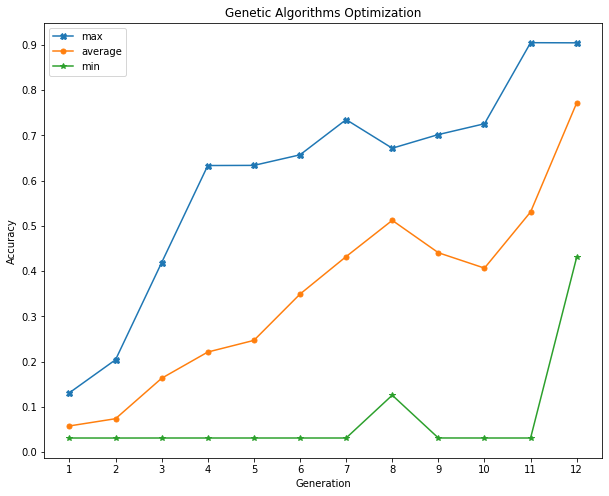

In [ ]:
import matplotlib.pyplot as plt

# load ad plot statistics # ls='dashed' to have this '---' # linewidth=2
print(statistics.keys())
generations = len(statistics['average'])

generations = list(range(1, generations + 1))

plt.figure(figsize=(10, 8))

plt.plot(generations, statistics['max'], label='max', marker='X')
plt.plot(generations, statistics['average'], label='average', marker='.', markersize=10)
plt.plot(generations, statistics['min'], label='min', marker='*')

plt.xticks(generations)
plt.yticks(np.linspace(0, 0.9, 10))

plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.title('Genetic Algorithms Optimization')
plt.legend()

# save graph 
save_path = '/content/drive/MyDrive/Colab Notebooks/4__thesis/thesis_plots/genetic_plot_ticks_ok.png'
plt.savefig(save_path)

plt.show()

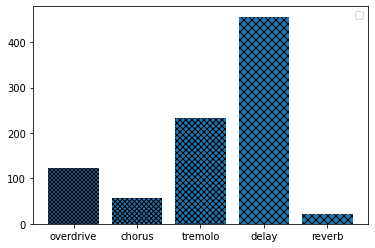

In [ ]:
# bar chart

labels = ['overdrive', 'chorus', 'tremolo', 'delay', 'reverb']
values = [123, 56, 234, 456, 22]

bars = plt.bar(labels, values)

bars[0].set_hatch('xxxxxx')
bars[1].set_hatch('xxxxx')
bars[2].set_hatch('xxxx')
bars[3].set_hatch('xxx')
bars[4].set_hatch('xxx')



plt.show()

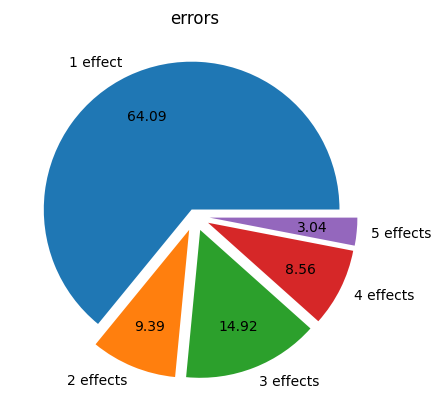

In [ ]:
# pie charts
labels = ['1 effect', '2 effects', '3 effects', '4 effects', '5 effects']
errors = [232, 34, 54, 31, 11]

plt.style.use('default')
plt.title('errors')
explode = [0.05, 0.1, 0.1, 0.1, 0.1]

plt.pie(errors, labels = labels, autopct='%.2f', pctdistance=0.7, explode=explode)  # '%.2f %%' -> to have percentages
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

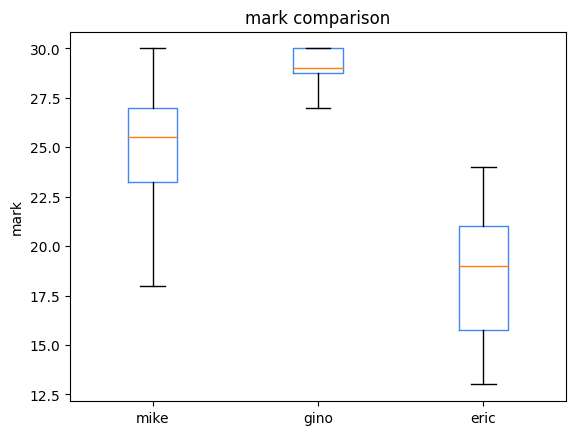

In [ ]:
# box plot

mike = [24, 25, 26, 30, 30, 26, 21, 18]
gino = [30, 29, 28, 29, 27, 30, 30, 29]
eric = [13, 18, 21, 16, 24, 15, 20, 21]

labels = ['mike', 'gino', 'eric']

boxes = plt.boxplot([mike, gino, eric], labels=labels)

for box in boxes['boxes']:
  box.set(color='#4286f4',  linewidth=1)

plt.title('mark comparison')
plt.ylabel('mark')
plt.plot

PLOT THESIS


In [ ]:
# imports
import json
from pprint import pprint

In [ ]:
# define save paths
base_path = '/content/drive/MyDrive/Colab Notebooks/4__thesis/thesis_plots/'
mean_accuracy_path = base_path + 'mean_accuracy_bar.png'
mean_accuracy_path_std = base_path + 'mean_accuracy_bar_std.png'
mean_std_accuracy_path = base_path + 'mean_std_accuracy_bar.png'
mean_error_each_effects_path = base_path + 'mean_error_each_effect.png'
error_each_guitar_effect_path = base_path + 'error_each_guit_effect.png'
error_std_each_guitar_effect_path = base_path + 'error_std_each_guit_effect.png'
error_std_4_guitars = base_path + 'error_std_4_guitars.png'
error_no_prs = base_path + 'error_no_prs.png'

In [ ]:
# load statistics
def load_statistics(statistic_path):
  with open(statistic_path, 'r') as fp:
    statistics = json.load(fp)
  return statistics

In [ ]:
# load current statistics and save all in a list
statistics_les = load_statistics('/content/drive/MyDrive/Colab Notebooks/4__thesis/models/statistics_les.json')
statistics_prs = load_statistics('/content/drive/MyDrive/Colab Notebooks/4__thesis/models/statistics_prs.json')
statistics_str = load_statistics('/content/drive/MyDrive/Colab Notebooks/4__thesis/models/statistics_str.json')
statistics_tele = load_statistics('/content/drive/MyDrive/Colab Notebooks/4__thesis/models/statistics_tele.json')

statistics_list = [statistics_les, statistics_prs, statistics_str, statistics_tele]
guitar_names = ['les', 'prs', 'str', 'tele']

In [ ]:
# print all the statistics
for stat in statistics_list:
  pprint(stat)

In [ ]:
print(mean_accuracy_path)

/content/drive/MyDrive/Colab Notebooks/4__thesis/thesis_plotsmean_accuracy_bar.png


les mean accuracy: 0.8621875
prs mean accuracy: 0.7671458333333333
str mean accuracy: 0.7684583333333332
tele mean accuracy: 0.8230624999999999
accuracy globale: 0.8052135416666666
std globale: 0.03988957570322085


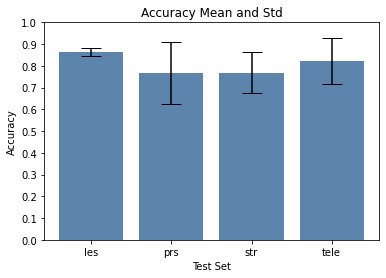

In [ ]:
# save mean accuracies in a list
mean_accuracies = []
mean_stds = []
for guitar_name, statistics_guitar in zip(guitar_names, statistics_list):
  current_mean_accuracy = statistics_guitar['accuracy_mean']
  print(f'{guitar_name} mean accuracy: {current_mean_accuracy}')
  mean_accuracies.append(current_mean_accuracy)

  current_mean_std = statistics_guitar['accuracy_std']
  mean_stds.append(current_mean_std)

# accuracy globale
acc_global = np.mean(mean_accuracies)
std_global = np.std(mean_accuracies)
print("accuracy globale:", acc_global)
print("std globale:", std_global)

# bar plot of mean accuracies
plt.bar(guitar_names, mean_accuracies, yerr=mean_stds, color=(0.2, 0.4, 0.6, 0.8),  ecolor='black', capsize=10)
plt.title('Accuracy Mean and Std')
plt.ylabel('Accuracy')
plt.xlabel('Test Set')
plt.yticks(np.linspace(0, 1, 11))

plt.savefig(mean_accuracy_path_std, dpi=200)
plt.show()


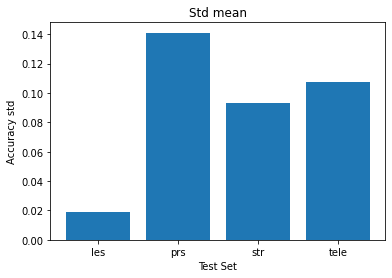

[0.01874048369617675, 0.14108007231907546, 0.0930303676524798, 0.10721147083762379]


In [ ]:
# mean std plot 
plt.bar(guitar_names, mean_stds)
plt.title('Std mean')
plt.ylabel('Accuracy std')
plt.xlabel('Test Set')
#plt.yticks(np.linspace(0, 1, 11))

#plt.savefig(mean_std_accuracy_path, dpi=200)
plt.show()

print(mean_stds)

In [ ]:
# mean error for each effect (mean between the 4 guitars)
effects = ['overdrive', 'chorus', 'tremolo', 'delay',  'reverb']
effects_mean_errors = [0, 0, 0, 0, 0]
test_guitar_samples = 16000

# get the mean error for each effect
for i, statistics_guitar in enumerate(statistics_list):
  effects_mean_errors[0] += statistics_guitar['class_errors_mean']['over_mean']/4
  effects_mean_errors[1] += statistics_guitar['class_errors_mean']['chor_mean']/4
  effects_mean_errors[2] += statistics_guitar['class_errors_mean']['trem_mean']/4
  effects_mean_errors[3] += statistics_guitar['class_errors_mean']['dela_mean']/4 
  effects_mean_errors[4] += statistics_guitar['class_errors_mean']['reve_mean']/4
  

# error percentage over 16000 samples in the test set
for i in range(5):
  effects_mean_errors[i] /= test_guitar_samples

[0.04021713 0.01404375 0.04844767 0.0173322  0.00106213]


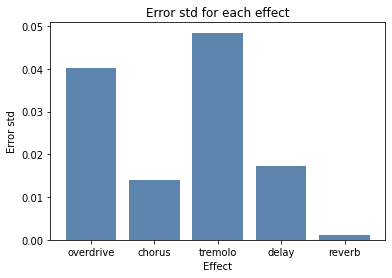

In [ ]:
# calculate effect std w.r.t the 4 different guitars
effects = ['overdrive', 'chorus', 'tremolo', 'delay',  'reverb']
guitar_names = ['les', 'prs', 'str', 'tele']
effects_mean_std = []

# for reach guitar I take the mean of each effect
les_err_mean = list(statistics_les['class_errors_mean'].values())
prs_err_mean = list(statistics_prs['class_errors_mean'].values())
str_err_mean = list(statistics_str['class_errors_mean'].values())
tele_err_mean = list(statistics_tele['class_errors_mean'].values())

overdrive_means = [les_err_mean[0], prs_err_mean[0], str_err_mean[0], tele_err_mean[0]]
chorus_means = [les_err_mean[1], prs_err_mean[1], str_err_mean[1], tele_err_mean[1]]
tremolo_means = [les_err_mean[2], prs_err_mean[2], str_err_mean[2], tele_err_mean[2]]
delay_means = [les_err_mean[3], prs_err_mean[3], str_err_mean[3], tele_err_mean[3]]
reverb_means = [les_err_mean[4], prs_err_mean[4], str_err_mean[4], tele_err_mean[4]]

over_std_4_guitars = np.std(overdrive_means)
chor_std_4_guitars = np.std(chorus_means)
trem_std_4_guitars = np.std(tremolo_means)
dela_std_4_guitars = np.std(delay_means)
reve_std_4_guitars = np.std(reverb_means)

error_std_over_4_guit = [over_std_4_guitars, chor_std_4_guitars, trem_std_4_guitars, dela_std_4_guitars, reve_std_4_guitars]
error_std_over_4_guit = np.array(error_std_over_4_guit)/16000

print(error_std_over_4_guit)

# plot
plt.bar(effects, error_std_over_4_guit, color=(0.2, 0.4, 0.6, 0.8))
plt.title('Error std for each effect')
plt.ylabel('Error std')
plt.xlabel('Effect')
#plt.yticks(np.linspace(0, 1, 11))

plt.savefig(error_std_4_guitars, dpi=200)
plt.show()


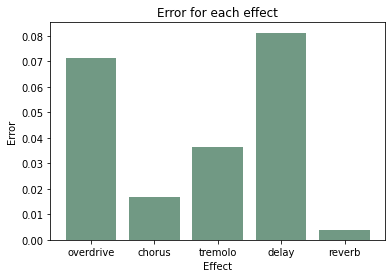

In [ ]:
# bar of effects error (mean over athe 4 guiatars)
effects = ['overdrive', 'chorus', 'tremolo', 'delay',  'reverb']

plt.bar(effects, effects_mean_errors, color=(0.2, 0.4, 0.6, 0.8))
plt.title('Error for each effect')
plt.ylabel('Error')
plt.xlabel('Effect')
#plt.yticks(np.linspace(0, 1, 11))

plt.savefig(mean_error_each_effects_path, dpi=200)
plt.show()

In [ ]:
# calculate the mean error of the prs excluding the 3rd run
prs_error_2_runs = [0, 0, 0, 0, 0]

for i, element in enumerate(statistics_prs['class_errors']):
  if i<2:
    error_each_effect = list(element.values())
    prs_error_2_runs += np.array(error_each_effect)/2

print(prs_error_2_runs)

[ 323.   197.   120.5 1556.    42.5]


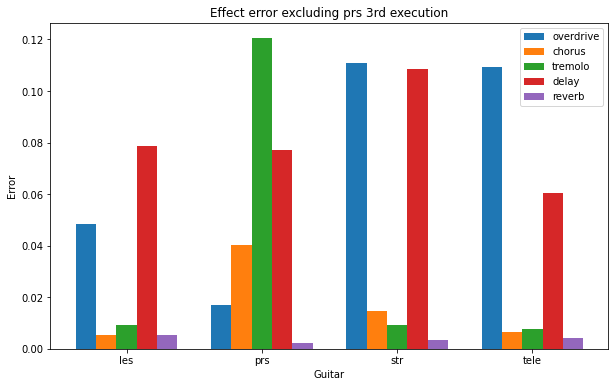

In [ ]:
# plot for each guitar the mean error of each effect
effects = ['overdrive', 'chorus', 'tremolo', 'delay',  'reverb']

les_error_effects = list(statistics_les['class_errors_mean'].values())
prs_error_effects = list(statistics_prs['class_errors_mean'].values())
str_error_effects = list(statistics_str['class_errors_mean'].values())
tele_error_effects = list(statistics_tele['class_errors_mean'].values())

# new - exclusion of prs 3rd run which was very strange
#prs_error_effects = prs_error_2_runs


# plot bar with 5 bars each
guitar_names = ['les', 'prs', 'str', 'tele']
x_values = np.arange(4)
width = 0.15

# [overd. error of les, of prs, of str, of tele]
overdrive_each_guitar = np.array([les_error_effects[0], prs_error_effects[0], str_error_effects[0], tele_error_effects[0]])/16000
chorus_each_guitar    = np.array([les_error_effects[1], prs_error_effects[1], str_error_effects[1], tele_error_effects[1]])/16000
tremolo_each_guitar   = np.array([les_error_effects[2], prs_error_effects[2], str_error_effects[2], tele_error_effects[2]])/16000
delay_each_guitar     = np.array([les_error_effects[3], prs_error_effects[3], str_error_effects[3], tele_error_effects[3]])/16000
reverb_each_guitar    = np.array([les_error_effects[4], prs_error_effects[4], str_error_effects[4], tele_error_effects[4]])/16000




plt.figure(figsize=(10,6))
plt.bar(x_values-2*width, overdrive_each_guitar, width)
plt.bar(x_values-width, chorus_each_guitar, width)
plt.bar(x_values, tremolo_each_guitar, width)
plt.bar(x_values+width, delay_each_guitar, width)
plt.bar(x_values+2*width, reverb_each_guitar, width)

plt.xticks(x_values, guitar_names)
plt.legend(effects)
plt.title('Effect error excluding prs 3rd execution')
plt.ylabel('Error')
plt.xlabel('Guitar')

plt.savefig(error_each_guitar_effect_path, dpi=200)
plt.show()


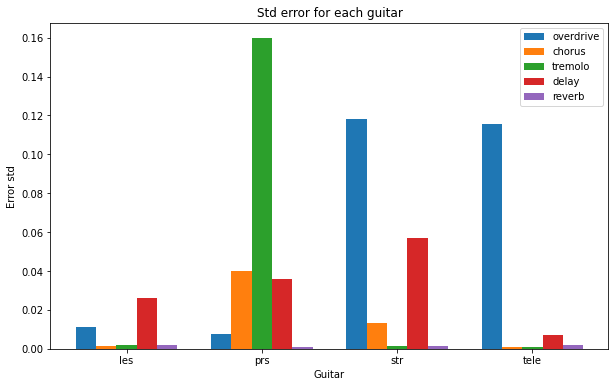

In [ ]:
# plot for each guitar the mean error of each effect
effects = ['overdrive', 'chorus', 'tremolo', 'delay',  'reverb']

les_error_effects = list(statistics_les['class_errors_std'].values())
prs_error_effects = list(statistics_prs['class_errors_std'].values())
str_error_effects = list(statistics_str['class_errors_std'].values())
tele_error_effects = list(statistics_tele['class_errors_std'].values())

# plot bar with 5 bars each
guitar_names = ['les', 'prs', 'str', 'tele']
x_values = np.arange(4)
width = 0.15

# [overd. error of les, of prs, of str, of tele]
overdrive_each_guitar = np.array([les_error_effects[0], prs_error_effects[0], str_error_effects[0], tele_error_effects[0]])/16000
chorus_each_guitar    = np.array([les_error_effects[1], prs_error_effects[1], str_error_effects[1], tele_error_effects[1]])/16000
tremolo_each_guitar   = np.array([les_error_effects[2], prs_error_effects[2], str_error_effects[2], tele_error_effects[2]])/16000
delay_each_guitar     = np.array([les_error_effects[3], prs_error_effects[3], str_error_effects[3], tele_error_effects[3]])/16000
reverb_each_guitar    = np.array([les_error_effects[4], prs_error_effects[4], str_error_effects[4], tele_error_effects[4]])/16000

plt.figure(figsize=(10,6))
plt.bar(x_values-2*width, overdrive_each_guitar, width)
plt.bar(x_values-width, chorus_each_guitar, width)
plt.bar(x_values, tremolo_each_guitar, width)
plt.bar(x_values+width, delay_each_guitar, width)
plt.bar(x_values+2*width, reverb_each_guitar, width)

plt.xticks(x_values, guitar_names)
plt.legend(effects)
plt.title('Std error for each guitar')
plt.ylabel('Error std')
plt.xlabel('Guitar')

plt.savefig(error_std_each_guitar_effect_path, dpi=200)
plt.show()

In [ ]:
pprint(statistics_prs)

{'accuracy_mean': 0.7671458333333333,
 'accuracy_std': 0.14108007231907546,
 'class_errors': [{'chorus': 78,
                   'delay': 1119,
                   'overdrive': 442,
                   'reverb': 54,
                   'tremolo': 118},
                  {'chorus': 316,
                   'delay': 1993,
                   'overdrive': 204,
                   'reverb': 31,
                   'tremolo': 123},
                  {'chorus': 1538,
                   'delay': 598,
                   'overdrive': 177,
                   'reverb': 26,
                   'tremolo': 5543}],
 'class_errors_mean': {'chor_mean': 644.0,
                       'dela_mean': 1236.6666666666667,
                       'over_mean': 274.3333333333333,
                       'reve_mean': 37.0,
                       'trem_mean': 1928.0},
 'class_errors_std': {'chor_std': 639.5769435077117,
                      'dela_std': 575.5521020917413,
                      'over_std': 119.06954083877017,


In [ ]:
pprint(statistics_tele)

In [ ]:
print(statistics_str['class_errors_mean'])
print(statistics_str['class_errors_mean'].values())

{'over_mean': 1772.6666666666667, 'chor_mean': 235.33333333333334, 'trem_mean': 146.0, 'dela_mean': 1738.3333333333333, 'reve_mean': 56.333333333333336}
dict_values([1772.6666666666667, 235.33333333333334, 146.0, 1738.3333333333333, 56.333333333333336])
